In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
# import tensorflow
import keras
from keras.models import Sequential,Model,load_model

Using TensorFlow backend.


In [3]:
run_list = ['00191']



first_S2_area_all_runs = {}
PMTs_S1_corrected_all_runs = {}
PMTs_S2_corrected_all_runs = {}

for run in run_list:
    
    def CutCondition(waveform):
        FirstPeak_area = sum(waveform[:15])
        SecondPeak_area = sum(waveform[15:])    
        if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
            return(True)
        else:
            return(False)
        
    def PrintWaveform(waveform,i):
    
        fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,sharex=False, figsize=(30, 5))
        ax1.plot(waveform[i])
        ax2.plot(waveform[i+1])
        ax3.plot(waveform[i+2])
        ax4.plot(waveform[i+3])
        ax5.plot(waveform[i+4])
        ax6.plot(waveform[i+5])
        ax7.plot(waveform[i+6])
        plt.show()
        

    
    def S2_found(integral, width):
        #maximum_S2 = max(waveform)
        if integral > 500 and width >200 and width < 2000:
            return True
        else:
            return False
        

    
    def Process(waveform, i): 
        SelectionCutFlag = CutCondition(waveform[i])
        if SelectionCutFlag == True:
            j = 1
            counter_timestamp = timestamp[i+j]
            threshold_timestamp = timestamp[i] + 45000
            while threshold_timestamp >= counter_timestamp and  S2_found(integral = integral[i+j], width = width[i+j]) == False:  
                j += 1
                counter_timestamp = timestamp[i+j]
            else:
                if S2_found(integral = integral[i+j], width = width[i+j]):

                   
                    k=1 
                    s2_counter_timestamp = timestamp[i+j+k]
                    while threshold_timestamp >= s2_counter_timestamp and S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
                        k += 1
                        s2_counter_timestamp = timestamp[i+j+k]
                    else:
                        if S2_found(integral = integral[i+j+k], width = width[i+j+k]):
                            first_S2_area.append(integral[i+j])


                
                        if threshold_timestamp <= s2_counter_timestamp:
                            
                            for m in range(len(PMT_S1_area_list_corrected)):
                                if area_per_channel[i+j][1] > 0 and area_per_channel[i+j][2] > 0 \
                                and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
                                and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
                                and area_per_channel[i+j][7] > 0 \
                                :
                                    PMT_S1_area_list_corrected[m].append(area_per_channel[i][m+1])
                                    PMT_S2_area_list_corrected[m].append(area_per_channel[i+j][m+1])
                                    

                            

                    
                    return
                else:
                    return

    ctx = straxbra.XebraContext()

    peaks_data = ctx.get_array(run, 'peaks')
    position_data = ctx.get_array(run, 'peak_positions')
    waveform = peaks_data['data']
    integral = peaks_data['area']
    width = peaks_data['width'][:,5]
    timestamp = peaks_data['time']
    risetime = -peaks_data['area_decile_from_midpoint'][:,1]
    area_per_channel = peaks_data['area_per_channel']
    x_position = position_data['x']
    y_position = position_data['y']

    

                                                                 
                                                                 
                                                                 
    first_S2_area  = []                                                             

                                                                 
    Area_s1_PMT1_corrected = []
    Area_s1_PMT2_corrected = []
    Area_s1_PMT3_corrected = []
    Area_s1_PMT4_corrected = []
    Area_s1_PMT5_corrected = []
    Area_s1_PMT6_corrected = []
    Area_s1_PMT7_corrected = []
                                                                 
    Area_s2_PMT1_corrected = []
    Area_s2_PMT2_corrected = []
    Area_s2_PMT3_corrected = []
    Area_s2_PMT4_corrected = []
    Area_s2_PMT5_corrected = []
    Area_s2_PMT6_corrected = []
    Area_s2_PMT7_corrected = []  
    
#     x_positions = []
#     y_positions = []
                                                                 
    PMT_S2_area_list_corrected = [Area_s2_PMT1_corrected, Area_s2_PMT2_corrected,Area_s2_PMT3_corrected,Area_s2_PMT4_corrected,Area_s2_PMT5_corrected,Area_s2_PMT6_corrected,Area_s2_PMT7_corrected]  
    PMT_S1_area_list_corrected = [Area_s1_PMT1_corrected, Area_s1_PMT2_corrected,Area_s1_PMT3_corrected,Area_s1_PMT4_corrected,Area_s1_PMT5_corrected,Area_s1_PMT6_corrected,Area_s1_PMT7_corrected]
     
                                                              
    num = len(waveform)
    print_counter = 0.0
    for i in range(0,num-10):    
        Process(waveform,i)
        if i/num >= print_counter:
            print(round(print_counter,2), end = ' ')
            print_counter += 0.1
    print(1.0, '        Run ',run, 'done!')
    
    

    
    first_S2_area_all_runs.update({run:first_S2_area})
    PMTs_S1_corrected_all_runs.update({run:PMT_S1_area_list_corrected}) 
    PMTs_S2_corrected_all_runs.update({run:PMT_S2_area_list_corrected}) 


0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00191 done!


In [8]:
print(len(PMTs_S1_corrected_all_runs['00191'][2]))

8894


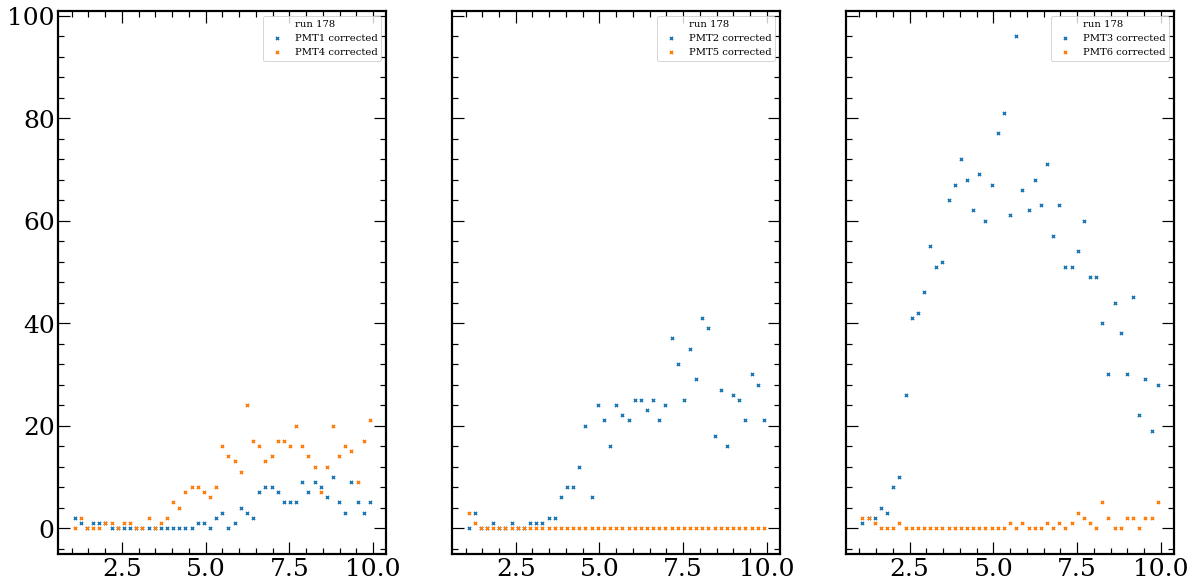

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,10),sharex=True, sharey=True)

#print(axes)

plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

for ax in [ax1, ax2, ax3]:

        #ax = plt.gca()
        ax.tick_params(axis = 'both')
        
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2.2)
        
        ax.xaxis.set_minor_locator(AutoMinorLocator(5)) 
        ax.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        ax.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
        ax.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)
    
    
    
bin_range = np.linspace(1, 10,50)


PMT1_corrected, binEdges_corrected_PMT1 = np.histogram(PMTs_S1_corrected_all_runs['00191'][0], bins=bin_range)
bincenters_corrected_PMT1 = 0.5 * (binEdges_corrected_PMT1[1:] + binEdges_corrected_PMT1[:-1])
PMT4_corrected, binEdges_corrected_PMT4 = np.histogram(PMTs_S1_corrected_all_runs['00191'][3], bins=bin_range)
bincenters_corrected_PMT4 = 0.5 * (binEdges_corrected_PMT4[1:] + binEdges_corrected_PMT4[:-1])
ax1.scatter(bincenters_corrected_PMT1, PMT1_corrected , s=10,c = 'C0', marker = 'x', label = 'PMT1 corrected')
ax1.scatter(bincenters_corrected_PMT4, PMT4_corrected , s=10,c = 'C1', marker = 'x', label = 'PMT4 corrected')
ax1.plot([], [], ' ', label="run 178")

PMT2_corrected, binEdges_corrected_PMT2 = np.histogram(PMTs_S1_corrected_all_runs['00191'][1], bins=bin_range)
bincenters_corrected_PMT2 = 0.5 * (binEdges_corrected_PMT2[1:] + binEdges_corrected_PMT2[:-1])
PMT5_corrected, binEdges_corrected_PMT5 = np.histogram(PMTs_S1_corrected_all_runs['00191'][4], bins=bin_range)
bincenters_corrected_PMT5 = 0.5 * (binEdges_corrected_PMT5[1:] + binEdges_corrected_PMT5[:-1])
ax2.scatter(bincenters_corrected_PMT2, PMT2_corrected , s=10,c = 'C0', marker = 'x', label = 'PMT2 corrected')
ax2.scatter(bincenters_corrected_PMT5, PMT5_corrected , s=10,c = 'C1', marker = 'x', label = 'PMT5 corrected')
ax2.plot([], [], ' ', label="run 178")

PMT3_corrected, binEdges_corrected_PMT3 = np.histogram(PMTs_S1_corrected_all_runs['00191'][2], bins=bin_range)
bincenters_corrected_PMT3 = 0.5 * (binEdges_corrected_PMT3[1:] + binEdges_corrected_PMT3[:-1])
PMT6_corrected, binEdges_corrected_PMT6 = np.histogram(PMTs_S1_corrected_all_runs['00191'][5], bins=bin_range)
bincenters_corrected_PMT6 = 0.5 * (binEdges_corrected_PMT6[1:] + binEdges_corrected_PMT6[:-1])
ax3.scatter(bincenters_corrected_PMT3, PMT3_corrected , s=10,c = 'C0', marker = 'x', label = 'PMT3 corrected')
ax3.scatter(bincenters_corrected_PMT6, PMT6_corrected , s=10,c = 'C1', marker = 'x', label = 'PMT6 corrected')
ax3.plot([], [], ' ', label="run 178")



for ax in [ax1,ax2,ax3]:
    ax.legend(prop={'size': 10})

plt.show()
